In [2]:
import matplotlib.pyplot as plt
import numpy as np
import sys
sys.path.insert(0, '../src/easyesn/')
import os
loc=os.getcwd() 

In [3]:
from mnist import MNIST #dataset of handwritten numbers 
mndata = MNIST(loc)
tr_images, tr_labels = mndata.load_training()
test_images, test_labels = mndata.load_testing()

In [5]:
img_shape = (28, 28)
for i in range(len(test_images)):
    test_images[i] = np.array(test_images[i]) / 255
     
for i in range(len(tr_images)):
    tr_images[i] = np.array(tr_images[i]) / 255

In [96]:
class simple_cls:
    w = (2*np.random.rand(10, 784) - 1) / 10
    b = (2*np.random.rand(10) - 1) / 10
    def relu(self,x): #activation function
        return np.maximum(x, 0)

    def classify(self,img): #classification function
        result = list(range(10))
        for i in range(10):
            res_vect= w[i] * img
            res_vect = relu(np.sum(res_vect) + b[i])
            result[i] = res_vect

        return np.argmax(result)
    def train(self,tr_images,tr_labels): #train func
        for n in range(len(tr_images)):
            img = tr_images[n]
            cls = tr_labels[n]
            #forward propagation
            resp = np.zeros(10, dtype=np.float32)
            for i in range(0,10):
                r = self.w[i] * img
                r = relu(np.sum(r) + self.b[i])
                resp[i] = r

            resp_cls = np.argmax(resp)
            resp = np.zeros(10, dtype=np.float32)
            resp[resp_cls] = 1.0
            #back propagation
            true_resp = np.zeros(10, dtype=np.float32)
            true_resp[cls] = 1.0

            error = resp - true_resp

            delta = error * ((resp >= 0) * np.ones(10))
            for i in range(0,10):
                w[i] -= np.dot(img, delta[i])
                b[i] -= delta[i]
    def calc_err(self,test_images,test_labels): #the percentage of valid answers
        valid=0
        for i in range(len(test_images)):
            img = test_images[i]
            predicted = nn_calculate(img)
            true = test_labels[i]
            if predicted == true:
                valid = valid + 1
        return (valid/len(test_images))



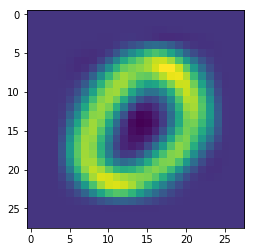

In [97]:
t=np.array(w[0])
t=t.reshape((28,28))
plt.imshow(t)
plt.show()

In [98]:
net=simple_cls()
net.train(tr_images,tr_labels)

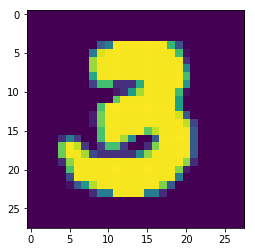

3

In [99]:
i=200
l=np.array(test_images[i])
l=l.reshape((28,28))
plt.imshow(l)
plt.show()
net.classify(test_images[i])

In [100]:
print("err is ",net.calc_err(tr_images,tr_labels))

err is  0.36975
